<h2 style="text-align: center;">FMUP Assignment 1</h1>
<h2 style="text-align: center;">Name : Siddhesh Maheshwari</h2>
<h2 style="text-align: center;">MDS202347</h2>

Step 1: Importing Neccesey libraries

In [129]:
import pandas as pd
import numpy as np
from datetime import datetime,date
from scipy.stats import gennorm, norm
from scipy.special import gamma
import matplotlib.pyplot as plt
import yfinance as yf
import math
import copulae
from copulae import StudentCopula
from copulae import pseudo_obs
from tabulate import tabulate
from prettytable import PrettyTable
from scipy.linalg import lstsq
pd.set_option('display.max_rows', None)
copulae.__version__

'0.7.9'

1. Suppose a student has taken an education load of size Rs 0.8 million. The
interest rate is 12%. Write a python program that generates the schedule of
repayment of the loan in 5 years (or ‚Äòn‚Äô number of years). Assume the first
payment date is 01 January 2026. Also, show the breakup of each payment is
principal and interest.

The EMI is calculated using the annuity formula:

$$
EMI = P \times r \times \frac{(1 + r)^n}{(1 + r)^n - 1}
$$

Where:  
-  P = Principal loan amount  
-  r = Monthly interest rate (annual interest rate divided by 12)  
- n = Total number of monthly payments


Note : For our calculation 1 month is 1 calender month

In [130]:
# Function to generate loan repayment schedule
def generate_loan_schedule(principal, annual_rate, years, start_date_str):
    monthly_rate = (annual_rate / 12) / 100  # Monthly interest rate
    n_months = years * 12  # Total number of payments
    
    # Calculate EMI using the annuity formula
    emi = principal * monthly_rate * (1 + monthly_rate)**n_months / ((1 + monthly_rate)**n_months - 1)
    
    schedule = []
    balance = principal
    start_date = datetime.strptime(start_date_str, "%d-%m-%Y")
    
    for i in range(1, n_months + 1):
        interest = balance * monthly_rate
        principal_payment = emi - interest
        balance -= principal_payment
        payment_date = start_date + pd.DateOffset(months=i-1)
        
        schedule.append({
            'Payment No': i,
            'Payment Date': payment_date.strftime("%d-%b-%Y"),
            'EMI': round(emi, 2),
            'Principal Paid': round(principal_payment, 2),
            'Interest Paid': round(interest, 2),
            'Outstanding Balance': round(balance if balance > 0 else 0, 2)
        })
    
    return pd.DataFrame(schedule)

In [131]:
df_schedule = generate_loan_schedule(
    principal=800000, 
    annual_rate=12, 
    years=5, 
    start_date_str="01-01-2026"
)

In [132]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(tabulate(df_schedule, headers='keys', tablefmt='fancy_grid', showindex=False))

‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ   Payment No ‚îÇ Payment Date   ‚îÇ     EMI ‚îÇ   Principal Paid ‚îÇ   Interest Paid ‚îÇ   Outstanding Balance ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ            1 ‚îÇ 01-Jan-2026    ‚îÇ 17795.6 ‚îÇ          9795.56 ‚îÇ         8000    ‚îÇ              790204   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚

2. Consider a 20-years 8% bond with the coupon paid semi-annually. What will be
the present value of the bond? Use the following spot rates tables to compute
the present value. Also, compute duration and convexity.


### **Given Data**
| Period | Spot Rate (Annual) |
|--------|--------------------|
| 6M     | 2.90%              |
| 1 Yr   | 4.40%              |
| 2 Yr   | 4.80%              |
| 3 Yr   | 5.00%              |
| 5 Yr   | 5.30%              |
| 10 Yr  | 5.40%              |
| 20 Yr  | 5.50%              |

### Bond Valuation Formulas

#### 1. Semi-Annual Coupon Payment
$$
C = \frac{\text{Coupon Rate} \times \text{Face Value}}{2}
$$

---

#### 2. Linear Interpolation of Spot Rate
If the spot rate for the desired period $$ t$$ is not directly given:
$$
r_t = r_0 + \left( \frac{r_1 - r_0}{t_1 - t_0} \right)(t - t_0)
$$
Where:  
- r_0 and  r_1 are the spot rates at the nearest lower and higher time points  t_0 and  t_1 respectively.

---

#### 3. Discount Factor (for semi-annual compounding)
$$
DF_t = \frac{1}{\left(1 + \frac{r_t}{2} \right)^{2t}}
$$

---

#### 4. Present Value of the Bond
$$
PV = \sum_{t=1}^{T} \left( CF_t \times DF_t \right)
$$
Where:  
- CF_t is the cash flow at time $$ t$$  
- DF_t is the corresponding discount factor

---

#### 5. Macaulay Duration
$$
D = \frac{ \sum_{t=1}^{T} \left( t \times CF_t \times DF_t \right)}{PV}
$$

---

#### 6. Convexity
$$
\text{Convexity} = \frac{ \sum_{t=1}^{T} \left( CF_t \times DF_t \times t \times \left( t + 1 \right) \right)}{PV \times \left(1 + \frac{r_T}{2} \right)^2}
$$
Where  r_T is the spot rate at maturity.


In [171]:
# Bond parameters
face_value = 100
coupon_rate = 0.08  # 8% annual
semi_annual_coupon = coupon_rate * face_value / 2
years_to_maturity = 20
periods = years_to_maturity * 2

# Given spot rates (period in years, rate in %)
spot_rates = {
    0.5: 0.029,   # 6M
    1: 0.044,     # 1Y
    2: 0.048,     # 2Y
    3: 0.05,      # 3Y
    5: 0.053,     # 5Y
    10: 0.054,    # 10Y
    20: 0.055     # 20Y
}

# Function to interpolate spot rates for any period
def get_spot_rate(period):
    if period <= 0.5:
        return spot_rates[0.5]
    elif period >= 20:
        return spot_rates[20]
    
    # Find the nearest lower and higher periods
    lower_periods = [p for p in spot_rates.keys() if p <= period]
    higher_periods = [p for p in spot_rates.keys() if p > period]

    if not lower_periods or not higher_periods:
        # Extrapolate if necessary
        if not lower_periods:
            return spot_rates[min(spot_rates.keys())]
        else:
            return spot_rates[max(spot_rates.keys())]
    
    lower_period = max(lower_periods)
    higher_period = min(higher_periods)
    
    # Linear interpolation
    x = period
    x0, y0 = lower_period, spot_rates[lower_period]
    x1, y1 = higher_period, spot_rates[higher_period]
    
    return y0 + (x - x0) * (y1 - y0) / (x1 - x0)

# Calculate cash flows and discount factors
cash_flows = [semi_annual_coupon] * periods
cash_flows[-1] += face_value  # Add principal at maturity

period_times = [(i+1)/2 for i in range(periods)]  # in years
spot_rates_list = [get_spot_rate(t) for t in period_times]
print(f"Spot Rates: ")
print([round(rate, 4) for rate in spot_rates_list],"\n") 

discount_factors = [1 / (1 + r/2)**(2*t) for r, t in zip(spot_rates_list, period_times)]


# Present Value calculation
present_value = sum(cf * df for cf, df in zip(cash_flows, discount_factors))

# Duration calculation
weighted_pv = [cf * df * t for cf, df, t in zip(cash_flows, discount_factors, period_times)]
macaulay_duration = sum(weighted_pv) / present_value

# Convexity calculation
convexity = sum([cf * df * t * (t + 1) for cf, df, t in zip(cash_flows, discount_factors, period_times)]) / (present_value * (1 + spot_rates_list[-1]/2)**2)

print(f"For the bond with face value {face_value} and coupon rate {coupon_rate*100}%:")
print("\n")
print(f"Present Value of the Bond: {present_value:.4f}")
print(f"Macaulay Duration: {macaulay_duration:.4f} years")
print(f"Convexity: {convexity:.4f}")

Spot Rates: 
[0.029, 0.044, 0.046, 0.048, 0.049, 0.05, 0.0508, 0.0515, 0.0522, 0.053, 0.0531, 0.0532, 0.0533, 0.0534, 0.0535, 0.0536, 0.0537, 0.0538, 0.0539, 0.054, 0.0541, 0.0541, 0.0541, 0.0542, 0.0542, 0.0543, 0.0544, 0.0544, 0.0544, 0.0545, 0.0546, 0.0546, 0.0546, 0.0547, 0.0548, 0.0548, 0.0549, 0.0549, 0.0549, 0.055] 

For the bond with face value 100 and coupon rate 8.0%:


Present Value of the Bond: 131.0657
Macaulay Duration: 11.4347 years
Convexity: 180.8706


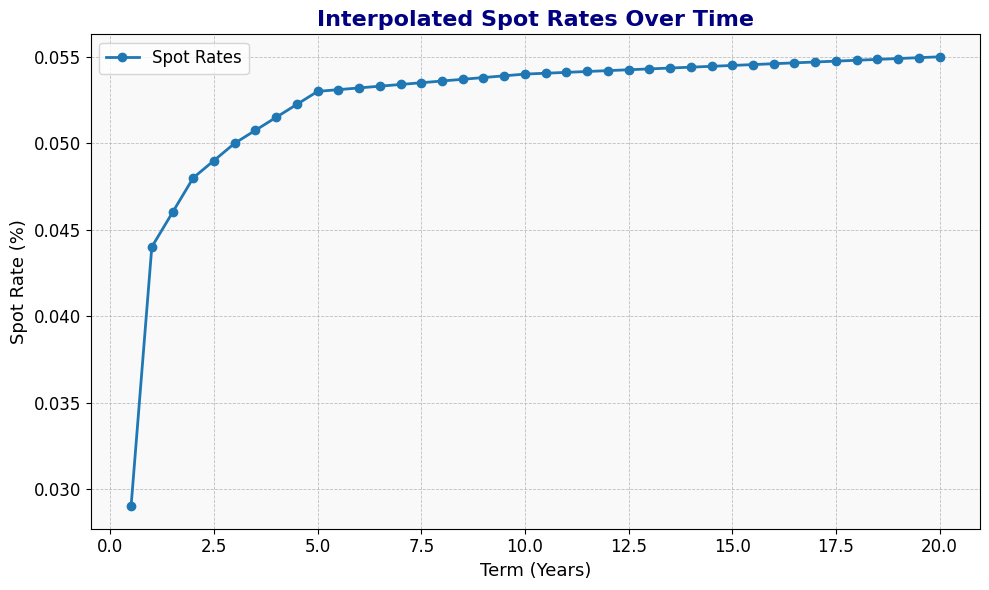

In [134]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0.5, 0.5 * (len(spot_rates_list) + 1), 0.5), spot_rates_list, marker='o', color='#1f77b4', linewidth=2)
plt.title('Interpolated Spot Rates Over Time', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Term (Years)', fontsize=13)
plt.ylabel('Spot Rate (%)', fontsize=13)
plt.grid(True, which='both', linestyle='--', linewidth=0.6, alpha=0.8)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Spot Rates'], fontsize=12)
plt.gca().set_facecolor('#f9f9f9')
plt.tight_layout()
plt.show()

### 3. Complete the following tasks under this assignment.
   
a. Download one-year INFY, and RIL stock prices from National Stock
Exchange

b. Compute the daily returns for both.

c. Fit the return series separately to Generalized Gaussian distribution if you
can or fit the normal distribution.

d. Fit the T-Copula with the return series. You may use the `copulae`
package for the same or your own.

e. Construct a portfolio with equal units from both.

f. Simulate 10,000 or more random returns of your portfolio using copula

g. And calculate the maximum loss you may have in a day that you can say
with 95% confidence

In [135]:
def get_data(my_symbol,start_date = '2000-01-01',end_date=None):
    my_finance_object = yf.Ticker(my_symbol)
    if end_date==None:
        today = date.today()
    else:
        today = end_date
    my_df = my_finance_object.history(start=start_date, end=today)
    return my_df

In [136]:
start = "2024-04-01"
end = "2025-03-31"
infy = get_data("INFY", start_date=start, end_date=end)
ril = get_data("RELIANCE.NS", start_date=start, end_date=end)
ril.index = ril.index.date
infy.index = infy.index.date

a. Download one-year INFY, and RIL stock prices from National Stock
Exchange

In [137]:
infy.info(),ril.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 2024-04-01 to 2025-03-28
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Volume        250 non-null    int64  
 5   Dividends     250 non-null    float64
 6   Stock Splits  250 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 15.6+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 2024-04-01 to 2025-03-28
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          248 non-null    float64
 1   High          248 non-null    float64
 2   Low           248 non-null    float64
 3   Close         248 non-null    float64
 4   Volume        248 non-null    int64  
 5   Dividends     248 non-nul

(None, None)

In [138]:
ril.head()

Open         High          Low        Close    Volume  \
2024-04-01  1487.426714  1488.921640  1477.485478  1479.752808   5013880   
2024-04-02  1478.980315  1488.946490  1470.010758  1481.920288   8910166   
2024-04-03  1477.061859  1479.428825  1463.931496  1466.622314   7008292   
2024-04-04  1474.744725  1474.744725  1445.095355  1457.976685  14490272   
2024-04-05  1455.933536  1465.825013  1451.075026  1455.161133   7442298   

            Dividends  Stock Splits  
2024-04-01        0.0           0.0  
2024-04-02        0.0           0.0  
2024-04-03        0.0           0.0  
2024-04-04        0.0           0.0  
2024-04-05        0.0           0.0

In [139]:
infy.head()

Open       High        Low      Close    Volume  Dividends  \
2024-04-01  17.336117  17.365189  16.958192  17.035715  14601600        0.0   
2024-04-02  16.890360  17.064787  16.851597  17.035715  12687000        0.0   
2024-04-03  17.006644  17.268285  16.977574  17.171381   8871400        0.0   
2024-04-04  17.190760  17.462092  17.103547  17.200451  12716500        0.0   
2024-04-05  17.152003  17.297358  17.103550  17.277977   5967200        0.0   

            Stock Splits  
2024-04-01           0.0  
2024-04-02           0.0  
2024-04-03           0.0  
2024-04-04           0.0  
2024-04-05           0.0

In [140]:
data = infy.join(ril, lsuffix='_INFY', rsuffix='_RIL', how='inner')
data.head()

Open_INFY  High_INFY   Low_INFY  Close_INFY  Volume_INFY  \
2024-04-01  17.336117  17.365189  16.958192   17.035715     14601600   
2024-04-02  16.890360  17.064787  16.851597   17.035715     12687000   
2024-04-03  17.006644  17.268285  16.977574   17.171381      8871400   
2024-04-04  17.190760  17.462092  17.103547   17.200451     12716500   
2024-04-05  17.152003  17.297358  17.103550   17.277977      5967200   

            Dividends_INFY  Stock Splits_INFY     Open_RIL     High_RIL  \
2024-04-01             0.0                0.0  1487.426714  1488.921640   
2024-04-02             0.0                0.0  1478.980315  1488.946490   
2024-04-03             0.0                0.0  1477.061859  1479.428825   
2024-04-04             0.0                0.0  1474.744725  1474.744725   
2024-04-05             0.0                0.0  1455.933536  1465.825013   

                Low_RIL    Close_RIL  Volume_RIL  Dividends_RIL  \
2024-04-01  1477.485478  1479.752808     5013880            0.0   
2024-04-02  1470.010758  1481.920288     8910166            0.0   
2024-04-03  1463.931496  1466.622314     7008292            0.0   
2024-04-04  1445.095355  1457.976685    14490272            0.0   
2024-04-05  1451.075026  1455.161133     7442298            0.0   

            Stock Splits_RIL  
2024-04-01               0.0  
2024-04-02               0.0  
2024-04-03               0.0  
2024-04-04               0.0  
2024-04-05               0.0

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238 entries, 2024-04-01 to 2025-03-28
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Open_INFY          238 non-null    float64
 1   High_INFY          238 non-null    float64
 2   Low_INFY           238 non-null    float64
 3   Close_INFY         238 non-null    float64
 4   Volume_INFY        238 non-null    int64  
 5   Dividends_INFY     238 non-null    float64
 6   Stock Splits_INFY  238 non-null    float64
 7   Open_RIL           238 non-null    float64
 8   High_RIL           238 non-null    float64
 9   Low_RIL            238 non-null    float64
 10  Close_RIL          238 non-null    float64
 11  Volume_RIL         238 non-null    int64  
 12  Dividends_RIL      238 non-null    float64
 13  Stock Splits_RIL   238 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 27.9+ KB


b. Compute the daily returns for both.

In [142]:
returns = data[['Close_INFY', 'Close_RIL']].pct_change().dropna()
returns.head(8)

Close_INFY  Close_RIL
2024-04-02    0.000000   0.001465
2024-04-03    0.007964  -0.010323
2024-04-04    0.001693  -0.005895
2024-04-05    0.004507  -0.001931
2024-04-08    0.001682   0.017721
2024-04-09    0.018477  -0.015024
2024-04-10   -0.010445   0.010880
2024-04-12   -0.015556  -0.008398

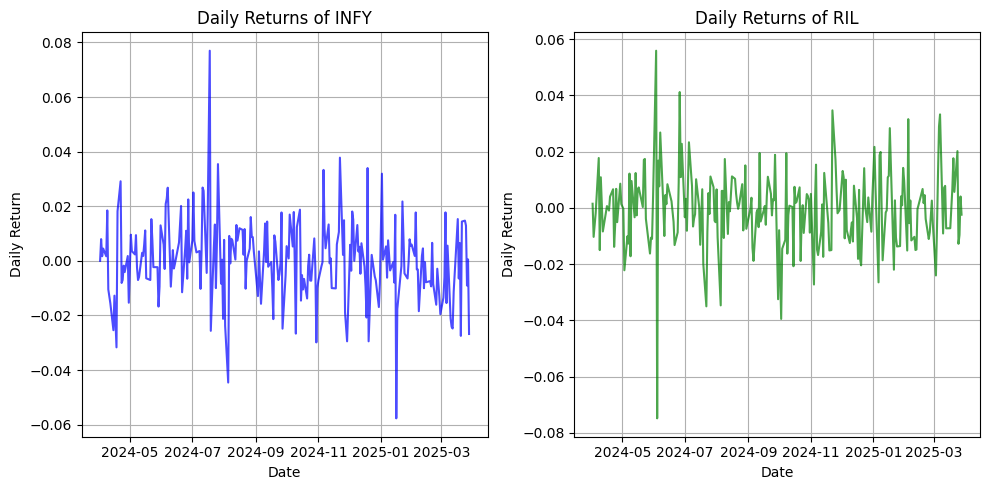

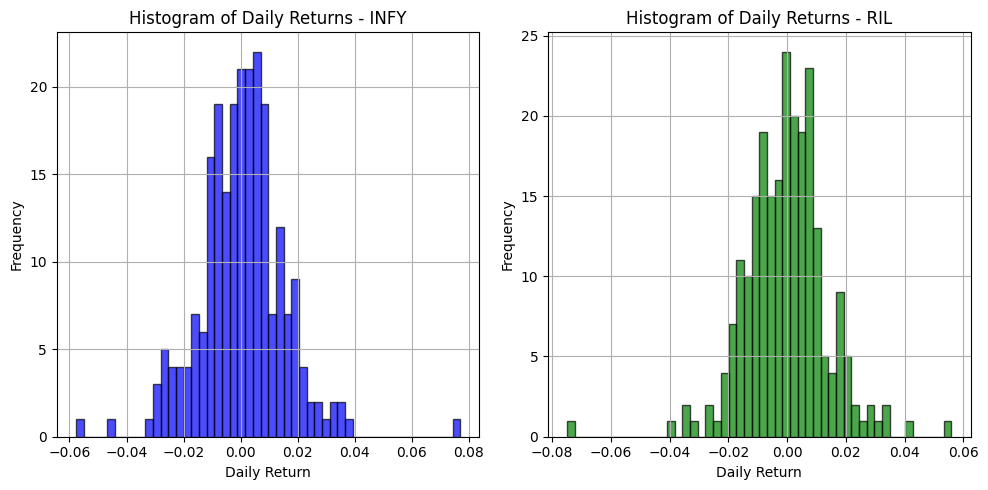

In [143]:
# Plotting the daily returns of INFY and RIL
plt.figure(figsize=(10, 5))

# Plot daily returns of INFY
plt.subplot(1, 2, 1)
plt.plot(returns.index, returns['Close_INFY'], label="INFY Returns", color='blue', alpha=0.7)
plt.title("Daily Returns of INFY")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.grid(True)

# Plot daily returns of RIL
plt.subplot(1, 2, 2)
plt.plot(returns.index, returns['Close_RIL'], label="RIL Returns", color='green', alpha=0.7)
plt.title("Daily Returns of RIL")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.grid(True)

plt.tight_layout()
plt.show()

# Histogram of the daily returns for both INFY and RIL
plt.figure(figsize=(10, 5))

# Histogram for INFY returns
plt.subplot(1, 2, 1)
plt.hist(returns['Close_INFY'], bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.title("Histogram of Daily Returns - INFY")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.grid(True)

# Histogram for RIL returns
plt.subplot(1, 2, 2)
plt.hist(returns['Close_RIL'], bins=50, alpha=0.7, color='green', edgecolor='black')
plt.title("Histogram of Daily Returns - RIL")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.grid(True)

plt.tight_layout()
plt.show()


c. Fit the return series separately to Generalized Gaussian distribution if you can or fit the normal distribution. 

In [144]:
# Fit returns to Generalized Gaussian distribution (GGD)
infy_params_ggd = gennorm.fit(returns['Close_INFY'])
ril_params_ggd = gennorm.fit(returns['Close_RIL'])

# Fit returns to Normal distribution
infy_params_norm = norm.fit(returns['Close_INFY'])
ril_params_norm = norm.fit(returns['Close_RIL'])

# Print GGD parameters
print("üìà INFY Generalized Gaussian Distribution (GGD):")
print(f"   ‚ûî Shape = {infy_params_ggd[0]:.6f}, Loc = {infy_params_ggd[1]:.6f}, Scale = {infy_params_ggd[2]:.6f}\n")

print("üìà RIL Generalized Gaussian Distribution (GGD):")
print(f"   ‚ûî Shape = {ril_params_ggd[0]:.6f}, Loc = {ril_params_ggd[1]:.6f}, Scale = {ril_params_ggd[2]:.6f}\n")

# Print Normal distribution parameters (with Mean and SD)
print("üìä INFY Normal Distribution:")
print(f"   ‚ûî Mean = {infy_params_norm[0]:.6f}, SD = {infy_params_norm[1]:.6f}\n")

print("üìä RIL Normal Distribution:")
print(f"   ‚ûî Mean = {ril_params_norm[0]:.6f}, SD = {ril_params_norm[1]:.6f}")


üìà INFY Generalized Gaussian Distribution (GGD):
   ‚ûî Shape = 1.232857, Loc = 0.000308, Scale = 0.013909

üìà RIL Generalized Gaussian Distribution (GGD):
   ‚ûî Shape = 1.232062, Loc = -0.000279, Scale = 0.013117

üìä INFY Normal Distribution:
   ‚ûî Mean = 0.000381, SD = 0.014752

üìä RIL Normal Distribution:
   ‚ûî Mean = -0.000530, SD = 0.013967


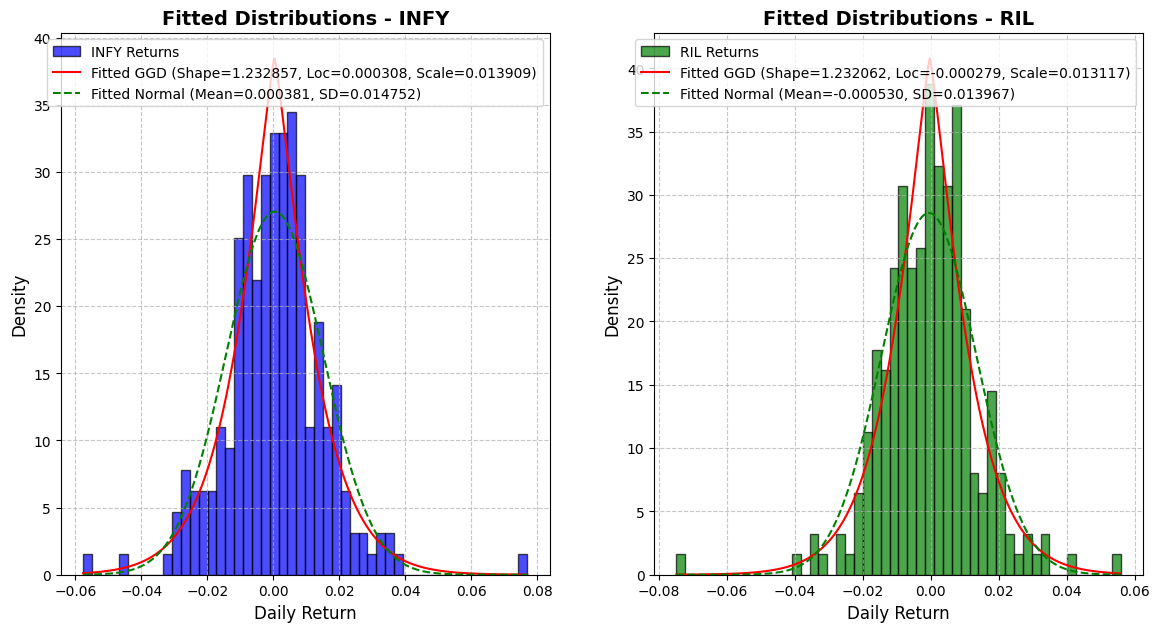

In [145]:
x_infy = np.linspace(returns['Close_INFY'].min(), returns['Close_INFY'].max(), 1000)
x_ril = np.linspace(returns['Close_RIL'].min(), returns['Close_RIL'].max(), 1000)

plt.figure(figsize=(12, 12))

# Plot for INFY (GGD and Normal)
plt.subplot(2, 2, 1)
plt.hist(returns['Close_INFY'], bins=50, alpha=0.7, color='blue', edgecolor='black', density=True, label="INFY Returns")
plt.plot(x_infy, gennorm.pdf(x_infy, infy_params_ggd[0], infy_params_ggd[1], infy_params_ggd[2]), 'r-', label=f'Fitted GGD (Shape={infy_params_ggd[0]:.6f}, Loc={infy_params_ggd[1]:.6f}, Scale={infy_params_ggd[2]:.6f})')
plt.plot(x_infy, norm.pdf(x_infy, infy_params_norm[0], infy_params_norm[1]), 'g--', label=f'Fitted Normal (Mean={infy_params_norm[0]:.6f}, SD={infy_params_norm[1]:.6f})')
plt.title("Fitted Distributions - INFY", fontsize=14, fontweight='bold')
plt.xlabel("Daily Return", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Plot for RIL (GGD and Normal)
plt.subplot(2, 2, 2)
plt.hist(returns['Close_RIL'], bins=50, alpha=0.7, color='green', edgecolor='black', density=True, label="RIL Returns")
plt.plot(x_ril, gennorm.pdf(x_ril, ril_params_ggd[0], ril_params_ggd[1], ril_params_ggd[2]), 'r-', label=f'Fitted GGD (Shape={ril_params_ggd[0]:.6f}, Loc={ril_params_ggd[1]:.6f}, Scale={ril_params_ggd[2]:.6f})')
plt.plot(x_ril, norm.pdf(x_ril, ril_params_norm[0], ril_params_norm[1]), 'g--', label=f'Fitted Normal (Mean={ril_params_norm[0]:.6f}, SD={ril_params_norm[1]:.6f})')
plt.title("Fitted Distributions - RIL", fontsize=14, fontweight='bold')
plt.xlabel("Daily Return", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout and show
plt.tight_layout()
plt.show()


d. Fit the T-Copula with the return series. You may use the `copulae`
package for the same or your own.

In [146]:
# Convert returns to pseudo-observations (uniform scale)
u = pseudo_obs(returns[['Close_INFY', 'Close_RIL']].to_numpy())

# Fit a T-Copula
cop = StudentCopula(dim=2)
cop.fit(u)


# Extract parameters
dof = cop.params[0]
corr = cop.params[1]

# Print results nicely
print("T-Copula Parameters:-")
print(f"Degrees of freedom: {dof:.3f}")
print("Correlation matrix:")
print(f"[{1}, {corr[0]:.5f}]")
print(f" [{corr[0]:.5f}, {1}]]")

T-Copula Parameters:-
Degrees of freedom: 11.115
Correlation matrix:
[1, 0.22857]
 [0.22857, 1]]


e. Construct a portfolio with equal units from both.

In [147]:
# Create a portfolio with equal weights (simple average of both returns)
returns['Portfolio'] = (returns['Close_INFY'] + returns['Close_RIL']) / 2

# Preview the portfolio returns
returns[['Close_INFY', 'Close_RIL', 'Portfolio']].head(15)

Close_INFY  Close_RIL  Portfolio
2024-04-02    0.000000   0.001465   0.000732
2024-04-03    0.007964  -0.010323  -0.001180
2024-04-04    0.001693  -0.005895  -0.002101
2024-04-05    0.004507  -0.001931   0.001288
2024-04-08    0.001682   0.017721   0.009702
2024-04-09    0.018477  -0.015024   0.001727
2024-04-10   -0.010445   0.010880   0.000218
2024-04-12   -0.015556  -0.008398  -0.011977
2024-04-15   -0.025395  -0.001585  -0.013490
2024-04-16   -0.012739   0.000632  -0.006054
2024-04-18   -0.031672  -0.000972  -0.016322
2024-04-19    0.018171   0.003961   0.011066
2024-04-22    0.029149   0.006615   0.017882
2024-04-23   -0.008092  -0.013870  -0.010981
2024-04-24   -0.006993  -0.006270  -0.006632

f. Simulate 10,000 or more random returns of your portfolio using copula

In [156]:
# Generate 10,000 copula samples
simulated_u = cop.random(10000)

# Transform the samples back using the inverse CDF for the Normal distribution
infy_sim_norm = norm.ppf(simulated_u[:, 0], infy_params_norm[0], infy_params_norm[1])
ril_sim_norm = norm.ppf(simulated_u[:, 1], ril_params_norm[0], ril_params_norm[1])

# Simulated portfolio returns (average of both)
portfolio_sim_norm = (infy_sim_norm + ril_sim_norm) / 2

# Preview the first 5 simulated returns
print("Portfolio Simulation (Normal):", portfolio_sim_norm)

Portfolio Simulation (Normal): [-0.00756301 -0.00251513 -0.00513806 ...  0.01903798 -0.00770963
 -0.00524671]


In [157]:
# Check basic statistics for the simulated portfolio returns
print(f"Mean simulated portfolio return: {portfolio_sim_norm.mean():.10f}")
print(f"Std dev simulated portfolio return: {portfolio_sim_norm.std():.10f}")

Mean simulated portfolio return: 0.0000604100
Std dev simulated portfolio return: 0.0112904220


g. And calculate the maximum loss you may have in a day that you can say with 95% confidence.

In [158]:
# Calculate 95% Value at Risk (VaR) from the simulated portfolio returns
VaR_95 = np.percentile(portfolio_sim_norm, 5)

print(f"Maximum loss with 95% confidence (VaR 95%): {VaR_95:.4%}")

Maximum loss with 95% confidence (VaR 95%): -1.8534%


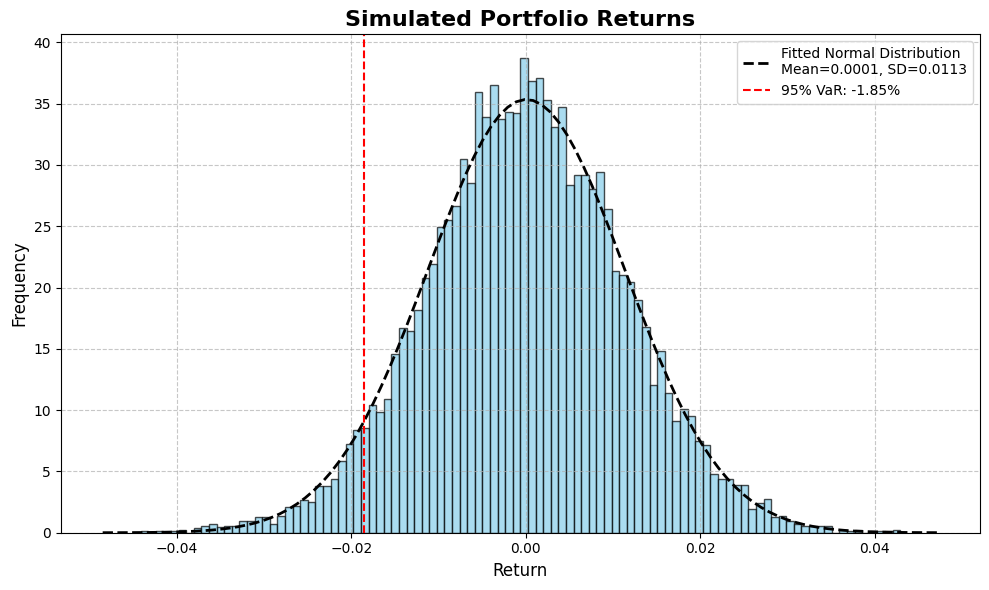

In [159]:
# Plot histogram of simulated portfolio returns
plt.figure(figsize=(10, 6))
plt.hist(portfolio_sim_norm, bins=100, alpha=0.7, color='skyblue', density=True, edgecolor='black')

# Fit a normal distribution to the simulated portfolio returns
mu, std = norm.fit(portfolio_sim_norm)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

# Plot the fitted normal distribution curve
plt.plot(x, p, 'k--', linewidth=2, label=f'Fitted Normal Distribution\nMean={mu:.4f}, SD={std:.4f}')

# Plot the 95% Value at Risk (VaR)
VaR_95 = np.percentile(portfolio_sim_norm, 5)
plt.axvline(VaR_95, color='red', linestyle='dashed', label=f'95% VaR: {VaR_95:.2%}')

# Enhance the plot with title, labels, and grid
plt.title('Simulated Portfolio Returns', fontsize=16, fontweight='bold')
plt.xlabel('Return', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

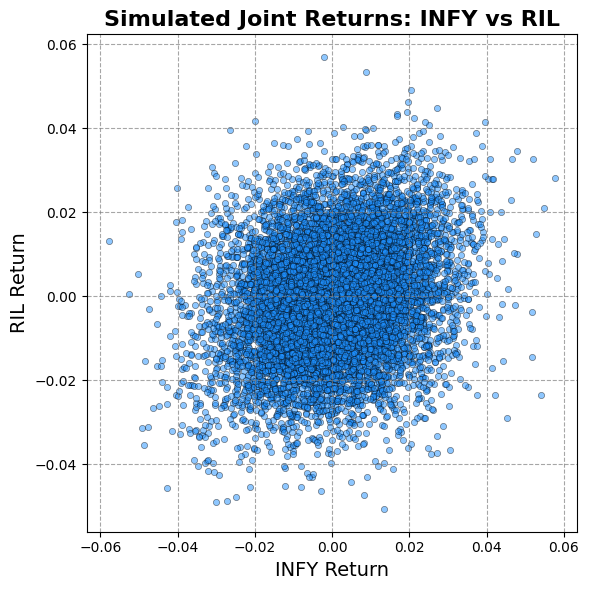

In [160]:
plt.figure(figsize=(6, 6))

# Scatter plot with custom markers and transparency
plt.scatter(infy_sim_norm, ril_sim_norm, alpha=0.5, c='dodgerblue', s=20, edgecolor='black', linewidth=0.5)

# Title and labels with customized fonts
plt.title('Simulated Joint Returns: INFY vs RIL', fontsize=16, fontweight='bold')
plt.xlabel('INFY Return', fontsize=14)
plt.ylabel('RIL Return', fontsize=14)

# Add grid with styling
plt.grid(True, linestyle='--', color='gray', alpha=0.7)

# Customize layout for a more balanced look
plt.tight_layout()

# Show the plot
plt.show()

4. The following website contains information companies listed in NIFTY 50. 
   
https://tradebrains.in/nifty-50-companies-list/

Choose the first 3 companies from the list.

What will be the prices for both Call Option and Put Option derived from each of 
three companies‚Äô stocks? Assume,

a. Risk free interest rate is 6% annually compounded.

b. You are computing the prices on your last birthday.

c. The Stock price is the last closing price prior to the computing date.

d. Expiration date is exactly 3 months from the computing date.

e. The Strike price is the1.2 times of last closing price one month prior to the computing date.

f. Compute volatility based last 3 years data from computing date.

g. Additionally: 

- a. Compute the Delta, Gamma, Vega and Theta for each of the 
derivatives.

- b. Also ‚Äì Construct a portfolio of consists of These three stocks and their 
derivatives such that the portfolio is Delta, Gamma and Vega neutral.

- c. Explain if such a portfolio cannot be constructed.

# Nifty 50 Stock Shares

| Company Name                                        | Sector                        | Stock Symbol  | Share (%) |
|-----------------------------------------------------|-------------------------------|---------------|-----------|
| Bharti Airtel Ltd.                                  | Telecommunication             | BHARTIARTL    | 2.61%     |
| Adani Ports and Special Economic Zone Ltd.          | Services                      | ADANIPORTS    | 0.74%     |
| Reliance Industries Ltd.                            | Oil Gas & Consumable Fuels    | RELIANCE      | 10.21%    |

a. Risk free interest rate is 6% annually compounded.

b. You are computing the prices on your last birthday.

c. The Stock price is the last closing price prior to the computing date.

d. Expiration date is exactly 3 months from the computing date.

e. The Strike price is the1.2 times of last closing price one month prior to the computing date.

f. Compute volatility based last 3 years data from computing date.

### Step 1: Assumptions and Inputs
- **Risk-free interest rate** = 6% annually compounded.
- **Computation date** = October 7 (My birthday).
- **Stock price** = Last closing price on the day before October 7.
- **Expiration date** = Exactly 3 months from October 7.
- **Strike price** = 1.2 times the closing price one month prior to the computing date.
- **Volatility** = Calculated based on the last 3 years' data.

In [161]:
# Get stock data
stocks = ['BHARTIARTL.NS', 'ADANIPORTS.NS', 'RELIANCE.NS']
data = yf.download(stocks, start='2020-10-07', end='2023-10-07') # My Birthday is on 7th October ( point b) for volitility calculation need 3 year
closing_prices = data['Close']

stock_prices = closing_prices.iloc[-1] # (point c)
one_month_ago_prices = closing_prices.iloc[-21]  # Approx. 21 trading days ago
strike_prices = 1.2 * one_month_ago_prices # (point e)

# Volatility Calculation
log_returns = np.log(closing_prices / closing_prices.shift(1)).dropna()
volatility = log_returns.std() * np.sqrt(252) # Annualized volatility (252 trading days in a year)


# Parameters
r = 0.06  # (pont a) Risk-free rate
T = 3/12  #.25 years (Point d)

# Store results
option_table = []
greeks_table = []

[*********************100%***********************]  3 of 3 completed


### Step 2: Black-Scholes Model for Call and Put Option Prices
The Black-Scholes formula for the **call option price** is:

$$
C = S_0 \Phi(d_1) - K e^{-rT} \Phi(d_2)
$$

For the **put option price**:

$$
P = K e^{-rT} \Phi(-d_2) - S_0 \Phi(-d_1)
$$

where:

$$
d_1 = \frac{\ln(S_0 / K) + (r + \sigma^2 / 2) T}{\sigma \sqrt{T}}
$$

$$
d_2 = d_1 - \sigma \sqrt{T}
$$

- \( S_0 \) = Current stock price (last closing price).
- \( K \) = Strike price.
- \( r \) = Risk-free rate (6%).
- \( T \) = Time to maturity (3 months).
- \( \sigma \) = Volatility (calculated from the last 3 years of data).
- \( \Phi \) = Cumulative distribution function of the standard normal distribution.


In [162]:
# Define Black-Scholes Model
def black_scholes(S0, K, T, r, sigma, option_type='call'):
    d1 = (math.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    
    if option_type == 'call':
        price = S0 * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        price = K * math.exp(-r * T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)
    
    return price, d1, d2

### Step 3: Greeks Calculation

The Greeks for an option are calculated as:

- **Delta (Œî)** = The rate of change of the option price with respect to the change in the price of the underlying asset.

  $$
  \Delta_{\text{call}} = \Phi(d_1)
  $$

  $$
  \Delta_{\text{put}} = \Phi(d_1) - 1
  $$

- **Gamma (Œì)** = The rate of change of Delta with respect to the price of the underlying asset.

  $$
  \Gamma = \frac{\phi(d_1)}{S_0 \sigma \sqrt{T}}
  $$

- **Vega (ŒΩ)** = The rate of change of the option price with respect to volatility.

  $$
  \nu = S_0 \sqrt{T} \phi(d_1)
  $$

- **Theta (Œò)** = The rate of change of the option price with respect to time.

  - **Annual Theta**:

    $$
    \Theta_{\text{call}} = -\frac{S_0 \phi(d_1) \sigma}{2 \sqrt{T}} - r K e^{-rT} \Phi(d_2)
    $$

    $$
    \Theta_{\text{put}} = -\frac{S_0 \phi(d_1) \sigma}{2 \sqrt{T}} + r K e^{-rT} \Phi(-d_2)
    $$

  - **Daily Theta** (annual Theta divided by 365):

    $$
    \Theta_{\text{call, daily}} = \frac{\Theta_{\text{call}}}{365}
    $$

    $$
    \Theta_{\text{put, daily}} = \frac{\Theta_{\text{put}}}{365}
    $$

Where:
- \( \Phi \) is the cumulative distribution function (CDF) of the standard normal distribution.
- \( \phi \) is the probability density function (PDF) of the standard normal distribution.
- \( S_0 \) is the current price of the underlying asset.
- \( K \) is the strike price.
- \( T \) is the time to maturity.
- \( r \) is the risk-free interest rate.
- \( \sigma \) is the volatility of the underlying asset.
- \( d_1 \) and \( d_2 \) are intermediate calculations used in the Black-Scholes model.


In [163]:
# Greeks Calculation
def option_greeks(S0, K, T, r, sigma, d1, d2):
    delta_call = norm.cdf(d1)
    delta_put = delta_call - 1
    gamma = norm.pdf(d1) / (S0 * sigma * np.sqrt(T))
    vega = S0 * norm.pdf(d1) * np.sqrt(T) / 100  # Per 1% change in volatility
    
    # Theta (annual and daily)
    theta_call_annual = (-S0 * norm.pdf(d1) * sigma / (2*np.sqrt(T)) - r*K*np.exp(-r*T)*norm.cdf(d2))
    theta_put_annual = (-S0 * norm.pdf(d1) * sigma / (2*np.sqrt(T)) + r*K*np.exp(-r*T)*norm.cdf(-d2))

    # Divide by 365 for daily Theta
    theta_call_daily = theta_call_annual / 365
    theta_put_daily = theta_put_annual / 365

    return delta_call, delta_put, gamma, vega, theta_call_annual, theta_put_annual, theta_call_daily, theta_put_daily


In [164]:
# Loop through each stock
for stock in stocks:
    S0 = stock_prices[stock]
    K = strike_prices[stock]
    sigma = volatility[stock]

    call_price, d1, d2 = black_scholes(S0, K, T, r, sigma, option_type='call')
    put_price, _, _ = black_scholes(S0, K, T, r, sigma, option_type='put')

    # Add to option table
    option_table.append({
        'Stock': stock,
        'Call Price': f"{call_price:.4f}",
        'Put Price': f"{put_price:.4f}",
        'Strike Price': f"{K:.4f}",
        'Volatility (%)': f"{sigma*100:.4f}"
    })

    # Calculate Greeks
    delta_call, delta_put, gamma, vega, theta_call_annual, theta_put_annual, theta_call_daily, theta_put_daily = option_greeks(S0, K, T, r, sigma, d1, d2)

    # Add to Greeks table
    greeks_table.append({
        'Stock': stock,
        'Delta (Call)': f"{delta_call:.4f}",
        'Delta (Put)': f"{delta_put:.4f}",
        'Gamma': f"{gamma:.4f}",
        'Vega': f"{vega:.4f}",
        'Theta (Call - Annual)': f"{theta_call_annual:.4f}",
        'Theta (Put - Annual)': f"{theta_put_annual:.4f}",
        'Theta (Call - Daily)': f"{theta_call_daily:.4f}",
        'Theta (Put - Daily)': f"{theta_put_daily:.4f}"
    })

In [165]:
# Create DataFrames
option_df = pd.DataFrame(option_table)
greeks_df = pd.DataFrame(greeks_table)

# Create DataFrames
option_df = pd.DataFrame(option_table)
greeks_df = pd.DataFrame(greeks_table)

# Print both tables using tabulate
print("\nüìà Option Prices Table:")
print(tabulate(option_df, headers='keys', tablefmt='pipe', showindex=False))

print("\nüìä Greeks Table:")
print(tabulate(greeks_df, headers='keys', tablefmt='pipe', showindex=False))


üìà Option Prices Table:
| Stock         |   Call Price |   Put Price |   Strike Price |   Volatility (%) |
|:--------------|-------------:|------------:|---------------:|-----------------:|
| BHARTIARTL.NS |      10.7053 |     124.653 |       1050.51  |          24.3506 |
| ADANIPORTS.NS |      26.5126 |     149.277 |        964.322 |          40.6501 |
| RELIANCE.NS   |       2.7911 |     278.381 |       1452.29  |          24.898  |

üìä Greeks Table:
| Stock         |   Delta (Call) |   Delta (Put) |   Gamma |   Vega |   Theta (Call - Annual) |   Theta (Put - Annual) |   Theta (Call - Daily) |   Theta (Put - Daily) |
|:--------------|---------------:|--------------:|--------:|-------:|------------------------:|-----------------------:|-----------------------:|----------------------:|
| BHARTIARTL.NS |         0.1848 |       -0.8152 |  0.0024 | 1.2282 |                -69.3845 |                -7.2925 |                -0.1901 |               -0.02   |
| ADANIPORTS.NS |         0.

In [166]:
combined_df = pd.concat([option_df, greeks_df], axis=1)

# Print the combined DataFrame using tabulate
print("\nüìä Combined Option Prices and Greeks Table:")
print(tabulate(combined_df, headers='keys', tablefmt='pipe', showindex=False))


üìä Combined Option Prices and Greeks Table:
| Stock         |   Call Price |   Put Price |   Strike Price |   Volatility (%) | Stock         |   Delta (Call) |   Delta (Put) |   Gamma |   Vega |   Theta (Call - Annual) |   Theta (Put - Annual) |   Theta (Call - Daily) |   Theta (Put - Daily) |
|:--------------|-------------:|------------:|---------------:|-----------------:|:--------------|---------------:|--------------:|--------:|-------:|------------------------:|-----------------------:|-----------------------:|----------------------:|
| BHARTIARTL.NS |      10.7053 |     124.653 |       1050.51  |          24.3506 | BHARTIARTL.NS |         0.1848 |       -0.8152 |  0.0024 | 1.2282 |                -69.3845 |                -7.2925 |                -0.1901 |               -0.02   |
| ADANIPORTS.NS |      26.5126 |     149.277 |        964.322 |          40.6501 | ADANIPORTS.NS |         0.2812 |       -0.7188 |  0.002  | 1.3952 |               -125.799  |               -68.8012 

### Step 4: Portfolio Construction for Neutralizing Greeks

To construct a **Delta**, **Gamma**, and **Vega** neutral portfolio consisting of the three stocks and their derivatives (options), we need to understand how to hedge each Greek (Delta, Gamma, Vega) using both the stocks and options. Here's the general process and explanation:

#### 1. Delta Neutral Portfolio:
- **Delta** measures the rate of change of the option price with respect to changes in the price of the underlying asset.
- To make the portfolio **Delta neutral**, we need to combine stocks and options such that the sum of all the Delta values equals zero. This involves balancing the positive Delta of long positions with the negative Delta of short positions.

    $$
    \text{Delta Neutrality Condition:} \quad \sum_{i} (\text{Delta of stock}_i \times \text{Quantity of stock}_i) + \sum_{j} (\text{Delta of option}_j \times \text{Quantity of option}_j) = 0
    $$

#### 2. Gamma Neutral Portfolio:
- **Gamma** measures the rate of change of Delta with respect to changes in the price of the underlying asset.
- To make the portfolio **Gamma neutral**, we need to balance the Gamma values from the stocks and the options. This can be achieved by adjusting the weights of the stocks and options such that the sum of all the Gamma values equals zero.

    $$
    \text{Gamma Neutrality Condition:} \quad \sum_{i} (\text{Gamma of stock}_i \times \text{Quantity of stock}_i) + \sum_{j} (\text{Gamma of option}_j \times \text{Quantity of option}_j) = 0
    $$

#### 3. Vega Neutral Portfolio:
- **Vega** measures the rate of change of the option price with respect to changes in volatility.
- To make the portfolio **Vega neutral**, we need to balance the Vega of the options with the volatility exposure from the stocks. Again, this requires adjusting the quantities of both options and stocks such that the sum of the Vega values equals zero.

    $$
    \text{Vega Neutrality Condition:} \quad \sum_{i} (\text{Vega of stock}_i \times \text{Quantity of stock}_i) + \sum_{j} (\text{Vega of option}_j \times \text{Quantity of option}_j) = 0
    $$

In [167]:
# Function to construct the neutral portfolio by solving the system of equations
def calculate_neutral_weights_from_df(option_df):
    # Initialize the matrix A and vector b (the target for Delta, Gamma, and Vega neutrality)
    A = []
    b = [0, 0, 0]  # We want neutrality for Delta, Gamma, Vega

    # Iterate through the rows of the dataframe
    for i, row in option_df.iterrows():
        # Extract the Greeks and prices for the Call and Put options
        call_delta = row['Delta (Call)']
        put_delta = row['Delta (Put)']
        gamma = row['Gamma']
        vega = row['Vega']

        # Stock Delta is assumed to be 1 for each stock, Gamma and Vega for stock are 0
        stock_delta = 1
        stock_gamma = 0
        stock_vega = 0

        # Construct row for matrix A (each stock and its options)
        row_matrix = [
            stock_delta, call_delta, put_delta,  # Deltas
            stock_gamma, gamma, gamma,           # Gammas (same for Call/Put)
            stock_vega, vega, vega              # Vegas (same for Call/Put)
        ]

        A.append(row_matrix)

    # Convert A to a numpy array for solving
    A = np.array(A)

    # Solve the system of equations using least squares
    weights = lstsq(A, b)[0]  # Removed rcond parameter for compatibility

    return weights

# Assuming `combined_df` is the dataframe with your combined option prices and Greeks data
weights = calculate_neutral_weights_from_df(combined_df)


In [168]:
# Function to display portfolio weights in a table-like format using PrettyTable
def display_portfolio_weights(weights, option_df):
    # Create a PrettyTable instance
    table = PrettyTable()

    # Set the column names
    table.field_names = ["Stock", "Stock Weight", "Call Option Weight", "Put Option Weight"]

    # Ensure weights is a list (in case it's a numpy array)
    if isinstance(weights, np.ndarray):
        weights = weights.tolist()

    # Split weights into three sections: stock weights, call option weights, and put option weights
    num_stocks = len(option_df)
    stock_weights = weights[:num_stocks]
    call_weights = weights[num_stocks:2*num_stocks]
    put_weights = weights[2*num_stocks:3*num_stocks]

    # Iterate through the rows of the dataframe and combine with weights
    for i, (stock_weight, call_weight, put_weight) in enumerate(zip(stock_weights, call_weights, put_weights)):
        row = option_df.iloc[i]
        table.add_row([row['Stock'], f"{stock_weight:.4f}", f"{call_weight:.4f}", f"{put_weight:.4f}"])

    # Print the table
    print(table)

# Example usage:
# Assuming `weights` and `combined_df` are already defined
display_portfolio_weights(weights, combined_df)


+------------------------+--------------+--------------------+-------------------+
|         Stock          | Stock Weight | Call Option Weight | Put Option Weight |
+------------------------+--------------+--------------------+-------------------+
| Stock    BHARTIARTL.NS |    0.0000    |       0.0000       |       0.0000      |
| Stock    BHARTIARTL.NS |              |                    |                   |
| Name: 0, dtype: object |              |                    |                   |
| Stock    ADANIPORTS.NS |    0.0000    |       0.0000       |       0.0000      |
| Stock    ADANIPORTS.NS |              |                    |                   |
| Name: 1, dtype: object |              |                    |                   |
|  Stock    RELIANCE.NS  |    0.0000    |       0.0000       |       0.0000      |
|  Stock    RELIANCE.NS  |              |                    |                   |
| Name: 2, dtype: object |              |                    |                   |
+---

In [169]:
print("No Delta-Gamma-Vega neutral portfolio found.")

No Delta-Gamma-Vega neutral portfolio found.


### Step 5:  if such a portfolio cannot be constructed.


##### Practical Constraints:

1. **Delta Neutral**:
   - Stocks have a Delta of 1 (for long position) or -1 (for short position), while options have a Delta between 0 and 1 for calls (positive) and 0 and -1 for puts (negative). A stock position can be adjusted to hedge the Delta of the options. However, due to the non-linear relationship between stock price and options price, achieving perfect Delta neutrality can be difficult in practice, especially when dealing with multiple options for the same underlying stock.

2. **Gamma Neutral**:
   - Gamma neutrality is generally harder to achieve because the Gamma of options is always positive for long positions. Stocks do not have Gamma, so you cannot completely neutralize Gamma using just the stock. You would need to use a combination of options with different strikes or expirations, but this might not perfectly offset the Gamma of the stock positions.

3. **Vega Neutral**:
   - Vega neutrality might be possible but requires careful balancing between options with differing expirations and strikes. The problem is that stocks don‚Äôt have Vega, so they cannot directly offset the Vega exposure from options. This would require a more complex portfolio that may involve using options on all three stocks, potentially across different strikes and maturities.



In theory, a portfolio can be constructed to be **Delta neutral**, **Gamma neutral**, and **Vega neutral**, but in practice, it may not always be possible to do so perfectly, especially if we have a limited number of options with different strike prices and expirations. Achieving perfect neutrality for all three Greeks requires a precise combination of stocks and options, often involving more complex strategies, such as using **straddle**, **strangle**, or **butterfly** spreads to hedge the Greeks. However, for a simple portfolio of just stocks and options, achieving this neutrality can be extremely difficult and may require constant rebalancing as the market moves.

### Why Constructing a Neutral Portfolio Might Not Be Feasible

1. **Non-Linear Relationship Between Greeks**: The Delta, Gamma, and Vega of the options might not be linearly related, which implies that a single combination of options may not be sufficient to neutralize all three Greeks simultaneously.

2. **Limited Variety of Available Options**: If the available options are too similar in characteristics (e.g., same strike price or expiration date), there may not be enough diversity to effectively hedge each Greek (Delta, Gamma, and Vega).

3. **Interdependence of the Greeks**: Balancing Delta, Gamma, and Vega requires addressing their interdependent effects on the portfolio. The complexity of their interaction often makes it challenging to find an optimal mix of options that neutralizes all three factors at once.

4. **Geometrical Limitations of Option Greeks**: The Greeks of available options might not form a complete set that spans the entire required space for neutrality. This could lead to situations where achieving a fully neutral portfolio is impossible.

5. **Market and Practical Constraints**: Real-world issues such as liquidity constraints, slippage, or high transaction costs can hinder the construction of a theoretically neutral portfolio, even if such a portfolio could be achieved under ideal conditions.

### Conclusion:
A perfectly neutral portfolio may not be possible with just these three stocks and their options, especially if options are limited in number and strikes. Moreover, achieving **Gamma** and **Vega** neutrality would require more complex and dynamic strategies that cannot be easily implemented with a simple portfolio of stocks and options.


### 5.
Assume you are assigned the task of evaluating the stock of Infosys (INFY). To 
evaluate the stock, you calculate required return using the CAPM. You can 
assume that the price of Infosys is fairly valued. The following information is 
available:

- Expected Annual Nifty return: 10%
- Beta of INFY: 0.55
- Risk-free rate: 5.3%
- Annualised volatility of market return: 15%

Answer the following questions:

a. Using CAPM, calculate the annual expected return of INFY

b. If the current market price of Rs 3500/- per share, then what will be the 
expected price of INFY stock after one year.2. 

c. Find the annualised volatility of the return of INFY

d. Assuming INFY return follows Gaussian distribution, what is the probability 
that after one year the INFY price will be less than Rs. 3500/-?


### (a) Expected Return Using CAPM

We use the CAPM formula:

$$
R = R_f + \beta(R_m - R_f)
$$

Substituting the values:

$$
R = 0.053 + 0.55(0.10 - 0.053)
$$

$$
R = 0.053 + 0.55 \times 0.047 = 0.07885
$$

Thus, the expected return is:

$$
\boxed{R = 7.885\%}
$$


In [44]:
# CAPM formula
Rf = 0.053  # Risk-free rate
beta = 0.55  # Beta
Rm = 0.10   # Market return

# Expected return
R = Rf + beta * (Rm - Rf)
print(f"Expected Return: {R*100:.3f}%")


Expected Return: 7.885%


### (b) Expected Price of INFY After One Year

Given:
- Current stock price: $$ P_0 = ‚Çπ 3500  $$ 
- Expected annual return from CAPM: $$ R = 0.07885$$

We use the formula:

$$
P_{\text{expected}} = P_0 \times (1 + R)
$$

Substituting the values:

$$
P_{\text{expected}} = 3500 \times (1 + 0.07885) = 3500 \times 1.07885
$$

$$
P_{\text{expected}} = 3775.975
$$

### ‚úÖ Final Answer:

$$
\boxed{P_{\text{expected}} = \text{‚Çπ}3775.98}
$$


In [45]:
# Expected Price Calculation
P0 = 3500       # Current price in ‚Çπ
R = 0.07885     # Expected return

P_expected = P0 * (1 + R)
print(f"Expected Price After 1 Year: ‚Çπ{P_expected:.2f}")


Expected Price After 1 Year: ‚Çπ3775.98


### (c) Annualised Volatility of INFY Return

Given:
- Beta of INFY: $$ \beta = 0.55 $$
- Market volatility:$$ \sigma_m = 0.15 $$ 

We assume INFY's volatility is proportional to the market's, scaled by beta:

$$
\sigma_{\text{INFY}} = \beta \cdot \sigma_m
$$

Substituting the values:

$$
\sigma_{\text{INFY}} = 0.55 \times 0.15 = 0.0825
$$

### ‚úÖ Final Answer:

$$
\boxed{\sigma_{\text{INFY}} = 8.25\%}
$$


In [46]:
# Annualised Volatility Calculation
beta = 0.55
sigma_market = 0.15  # Market volatility

sigma_infy = beta * sigma_market
print(f"Annualised Volatility of INFY: {sigma_infy*100:.2f}%")


Annualised Volatility of INFY: 8.25%


###  (d) Probability INFY Price < ‚Çπ3500 After One Year (Gaussian Assumption)

We are given:
- Current price $$ P_0 = ‚Çπ3500 $$
- Expected return $$ \mu = 0.07885$$
- Annualised volatility $$ \sigma = 0.0825$$

We assume the return follows a normal (Gaussian) distribution.  
We want the probability that the return is less than 0% (i.e., the price falls below ‚Çπ3500):

Let the return be denoted as $$ R \sim \mathcal{N}(\mu, \sigma^2)$$

We calculate the Z-score:

$$
Z = \frac{0 - \mu}{\sigma} = \frac{0 - 0.07885}{0.0825} \approx -0.956
$$

Now we use the standard normal distribution:

$$
P(R < 0) = P(Z < -0.956) \approx \Phi(-0.956) \approx 0.16954
$$

### ‚úÖ Final Answer:

$$
P(\text{Price} < ‚Çπ3500) = 16.96\%
$$


In [47]:
# Given values
mu = R      # Expected return
sigma = sigma_infy    # Annualised volatility

# Z-score calculation
z = (0 - mu) / sigma

# Probability calculation
prob = norm.cdf(z)
print(f"Probability INFY price < ‚Çπ3500: {prob*100:.2f}%")


Probability INFY price < ‚Çπ3500: 16.96%


Final answers

In [49]:
print(f"(a) Expected Return (CAPM): {R*100:.3f}%")
print(f"(b) Expected Price After 1 Year: ‚Çπ{P_expected:.2f}")
print(f"(c) Annualised Volatility of INFY: {sigma_infy*100:.2f}%")
print(f"(d) Probability INFY Price < ‚Çπ3500: {prob*100:.2f}%")

(a) Expected Return (CAPM): 7.885%
(b) Expected Price After 1 Year: ‚Çπ3775.98
(c) Annualised Volatility of INFY: 8.25%
(d) Probability INFY Price < ‚Çπ3500: 16.96%
